In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("dataset/data.csv")

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data['date'] = data['InvoiceDate'].apply(lambda x : x.split()[0])
data['time'] = data['InvoiceDate'].apply(lambda x : x.split()[1])

In [7]:
data['hour'] = data['time'].apply(lambda x : x.split(':')[0])

In [8]:
data['date'] = data['date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y'))
data['year'] = data['date'].apply(lambda x : x.year)
data['month'] = data['date'].apply(lambda x : x.month)
data['day'] = data['date'].apply(lambda x : x.day)
data ['quarter'] = data['date'].apply(lambda x : x.quarter)
data['weekday'] = data['date'].apply(lambda x : x.day_name())

In [55]:
data['price'] = data['Quantity'] * data['UnitPrice']

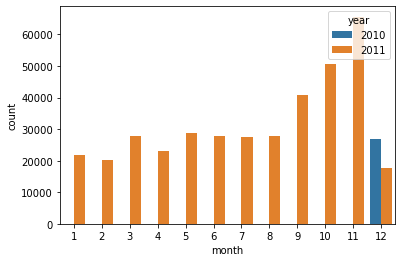

In [9]:
sns.countplot(x=data['month'], hue=data['year'])
plt.show();

<AxesSubplot:xlabel='day', ylabel='count'>

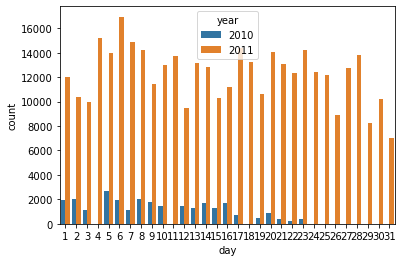

In [10]:
sns.countplot(x=data['day'], hue=data['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

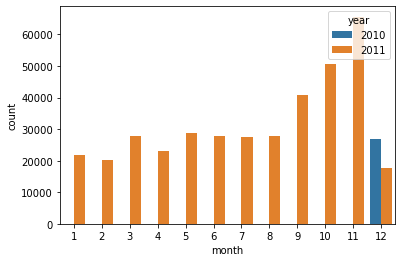

In [11]:
sns.countplot(x=data['month'], hue=data['year'])

<AxesSubplot:xlabel='weekday', ylabel='count'>

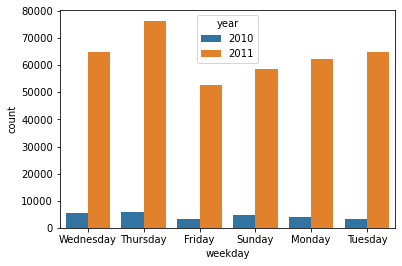

In [12]:
sns.countplot(x=data['weekday'], hue=data['year'])

<AxesSubplot:xlabel='hour', ylabel='count'>

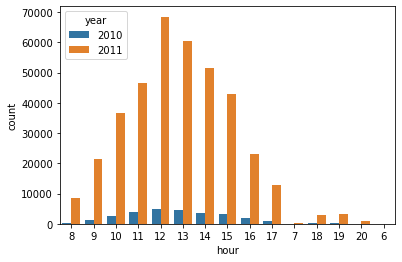

In [13]:
sns.countplot(x=data['hour'], hue=data['year'])

In [15]:
data.describe()

,Quantity,UnitPrice,CustomerID,year,month,day
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,2010.934002,7.605947,15.036128
std,248.693370,69.315162,1713.600303,0.248279,3.418942,8.653730
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000
25%,2.000000,1.250000,13953.000000,2011.000000,5.000000,7.000000
50%,5.000000,1.950000,15152.000000,2011.000000,8.000000,15.000000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000,22.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000


### Quantity -1 인 이유 
    - 취소된 상품
    - 취소되면 'InvoiceNo'에 C가 붙게됨

In [63]:
tmp = data[data['Quantity'] < 0]

In [72]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 141 to 541717
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8905 non-null   object        
 1   StockCode    8905 non-null   object        
 2   Description  8905 non-null   object        
 3   Quantity     8905 non-null   int64         
 4   InvoiceDate  8905 non-null   object        
 5   UnitPrice    8905 non-null   float64       
 6   CustomerID   8905 non-null   float64       
 7   Country      8905 non-null   object        
 8   date         8905 non-null   datetime64[ns]
 9   time         8905 non-null   object        
 10  hour         8905 non-null   object        
 11  year         8905 non-null   int64         
 12  month        8905 non-null   int64         
 13  day          8905 non-null   int64         
 14  weekday      8905 non-null   object        
 15  price        8905 non-null   float64       
dtypes:

In [81]:
tmp[tmp['InvoiceNo'].str.find("C") != 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,hour,year,month,day,weekday,price


In [91]:
data[(data['InvoiceNo'].str.find("C") == 0) & (data['Quantity'] > 0 )]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,hour,year,month,day,weekday,price


In [200]:
data[data['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,hour,year,month,day,weekday,price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,10:01,10,2011,1,18,Tuesday,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,2011-01-18,10:17,10,2011,1,18,Tuesday,-77183.6


### StockCode의 규칙
 - 문자로 이루어진 stockcode는 description도 통일되어 있음

In [111]:
data['StockCode'].value_counts()

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
20892        1
35597A       1
90138        1
84802B       1
35650        1
Name: StockCode, Length: 3684, dtype: int64

In [156]:
# 문자로만
a = data[data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
a['StockCode'].value_counts()

POST            1196
M                465
C2               134
D                 77
CRUK              16
DOT               16
BANK CHARGES      12
PADS               4
Name: StockCode, dtype: int64

In [185]:
a[['StockCode', 'Description']].groupby(['StockCode', 'Description']).count()

,
StockCode,Description
BANK CHARGES,Bank Charges
C2,CARRIAGE
CRUK,CRUK Commission
D,Discount
DOT,DOTCOM POSTAGE
M,Manual
PADS,PADS TO MATCH ALL CUSHIONS
POST,POSTAGE


<AxesSubplot:xlabel='StockCode', ylabel='count'>

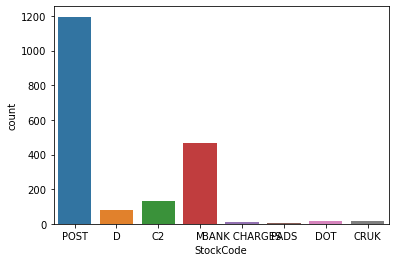

In [186]:
sns.countplot(a['StockCode'])

In [159]:
# 숫자로만
b = data[~data['StockCode'].str.contains('[^0-9]', regex=True)]
b.describe()

,Quantity,UnitPrice,CustomerID,year,month,day,price
count,371020.000000,371020.000000,371020.000000,371020.000000,371020.000000,371020.000000,371020.000000
mean,12.154081,2.921309,15289.041203,2010.936049,7.638249,15.049582,20.395341
std,260.124069,4.536956,1712.439510,0.244665,3.404997,8.657659,440.920403
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000,-168469.600000
25%,2.000000,1.250000,13956.000000,2011.000000,5.000000,7.000000,4.250000
50%,5.000000,1.850000,15154.000000,2011.000000,9.000000,15.000000,11.560000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000,22.000000,19.500000
max,80995.000000,649.500000,18287.000000,2011.000000,12.000000,31.000000,168469.600000


In [144]:
# 숫자 + 문자, 문자
data[data['StockCode'].str.contains('[^0-9]', regex=True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,hour,year,month,day,weekday,price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,15.30
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,20.34
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,2010-12-01,8:45,8,2010,12,1,Wednesday,54.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,12/9/2011 12:16,4.15,12713.0,Germany,2011-12-09,12:16,12,2011,12,9,Friday,33.20
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,12/9/2011 12:19,1.79,17581.0,United Kingdom,2011-12-09,12:19,12,2011,12,9,Friday,17.90
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,12/9/2011 12:20,0.42,12748.0,United Kingdom,2011-12-09,12:20,12,2011,12,9,Friday,0.84
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,12/9/2011 12:20,1.25,12748.0,United Kingdom,2011-12-09,12:20,12,2011,12,9,Friday,1.25


## To do
- customer : 
- country : 
- Description : 워드 클라우드 (가장 많이 나온 단어)
    - cancel 한 상품
    - cancel 안한 상품
- revenue(price) :
        - 시간대, 달, 일, 요일, 분기 별로
- reorder : 
    - reorder

In [204]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,hour,year,month,day,weekday,price,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,15.30,4
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,20.34,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,22.00,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,20.34,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8:26,8,2010,12,1,Wednesday,20.34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09,12:50,12,2011,12,9,Friday,10.20,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09,12:50,12,2011,12,9,Friday,12.60,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,12:50,12,2011,12,9,Friday,16.60,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,12:50,12,2011,12,9,Friday,16.60,4
